# 1. Import Libraries and Download Data

Import Libraries

In [ ]:
import zipfile
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score

Download XGBoost Model for future use

In [ ]:
!pip install xgboost
import xgboost as xgb

Download Train and Test Data

In [ ]:
!gdown '15z1nGcXqkNCJSroeg6D7J7f7upncrBrE'
!gdown '1z8JQrKqYZChbvJlknUPJkyDpw61Bfuh_'

Downloading...
From: https://drive.google.com/uc?id=15z1nGcXqkNCJSroeg6D7J7f7upncrBrE
To: /content/train.csv
100% 16.5M/16.5M [00:00<00:00, 76.2MB/s]
Downloading...
From: https://drive.google.com/uc?id=1z8JQrKqYZChbvJlknUPJkyDpw61Bfuh_
To: /content/public_test_set.csv
100% 3.46M/3.46M [00:00<00:00, 29.8MB/s]


# 2. Exploratory Data Analysis

## Checking data statistics

In [ ]:
data = pd.read_csv('train.csv')
data

,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,PM2.5
0,129.0,29.0,78.0,4800.0,2.0,-0.7,1019.6,-4.6,0.0,ENE,0.9,116.0
1,101.0,4.0,49.0,2500.0,2.0,21.2,992.8,20.7,0.0,NE,1.3,141.0
2,29.0,NaN,20.0,400.0,40.0,-1.1,1016.0,-16.5,0.0,E,2.1,26.0
3,419.0,13.0,176.0,7900.0,2.0,-1.0,1023.8,-3.2,0.0,ESE,1.6,378.0
4,140.0,2.0,24.0,1000.0,58.0,21.6,991.0,19.9,0.0,E,0.6,140.0
...,...,...,...,...,...,...,...,...,...,...,...,...
280507,98.0,24.0,82.0,1700.0,23.0,0.6,1013.1,-5.9,0.0,WNW,0.8,101.0
280508,150.0,29.0,58.0,1700.0,16.0,-2.5,1020.7,-6.7,0.0,SE,1.3,137.0
280509,283.0,18.0,116.0,4400.0,6.0,1.0,1021.0,-0.6,0.0,WNW,0.9,191.0
280510,85.0,3.0,19.0,400.0,79.0,35.0,994.4,15.8,0.0,SSE,1.1,30.0


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 280512 entries, 0 to 280511
Data columns (total 12 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   PM10    276518 non-null  float64
 1   SO2     274943 non-null  float64
 2   NO2     272151 non-null  float64
 3   CO      266022 non-null  float64
 4   O3      272089 non-null  float64
 5   TEMP    280226 non-null  float64
 6   PRES    280228 non-null  float64
 7   DEWP    280221 non-null  float64
 8   RAIN    280232 non-null  float64
 9   wd      279068 non-null  object 
 10  WSPM    280278 non-null  float64
 11  PM2.5   274850 non-null  float64
dtypes: float64(11), object(1)
memory usage: 25.7+ MB


In [ ]:
data.describe(include='all').transpose()

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
PM10,276518.0,NaN,NaN,NaN,105.348214,91.901267,2.0,36.0,83.0,146.0,999.0
SO2,274943.0,NaN,NaN,NaN,16.164495,21.965474,0.2856,2.0,7.9968,20.0,500.0
NO2,272151.0,NaN,NaN,NaN,51.485212,34.981628,1.0265,24.0,44.0,72.0,276.0
CO,266022.0,NaN,NaN,NaN,1240.888171,1164.054442,100.0,500.0,900.0,1500.0,10000.0
O3,272089.0,NaN,NaN,NaN,56.424005,56.343474,0.2142,10.0,44.0,80.0,1071.0
TEMP,280226.0,NaN,NaN,NaN,13.467613,11.45245,-19.9,3.0,14.4,23.2,41.6
PRES,280228.0,NaN,NaN,NaN,1010.66181,10.443439,982.4,1002.2,1010.3,1019.0,1042.8
DEWP,280221.0,NaN,NaN,NaN,2.513185,13.806107,-43.4,-8.9,3.1,15.2,29.1
RAIN,280232.0,NaN,NaN,NaN,0.064697,0.824627,0.0,0.0,0.0,0.0,72.5
wd,279068,16,NE,29366,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Checking Correlation Between Features




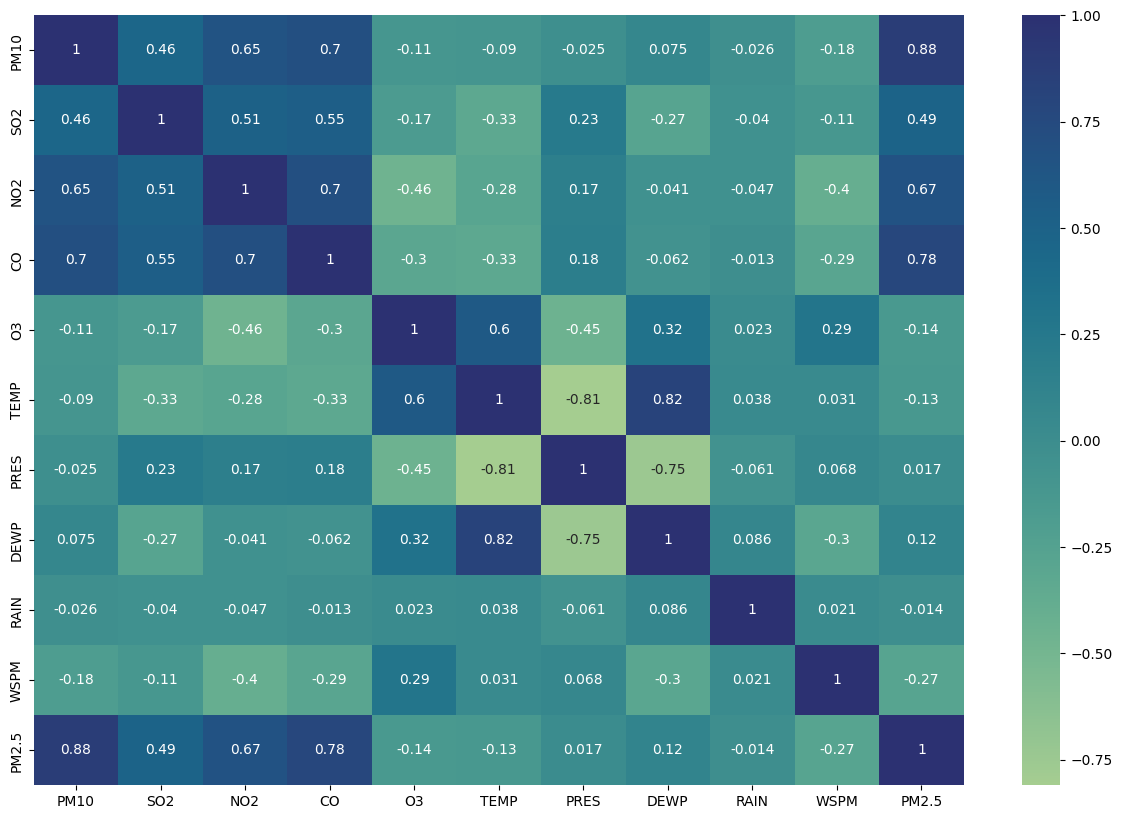

In [ ]:
def corr(data):
    numeric_data = data.select_dtypes(include=[float, int])
    correlation = numeric_data.corr()
    plt.figure(figsize=(15,10))
    sns.heatmap(correlation, annot=True, cmap='crest')

corr(data)

## Checking Missing Values

In [ ]:
def miss_value(data):
    missing_values = data.isnull().mean() * 100
    return missing_values

miss_value(data)

PM10     1.423825
SO2      1.985298
NO2      2.980621
CO       5.165554
O3       3.002724
TEMP     0.101956
PRES     0.101243
DEWP     0.103739
RAIN     0.099817
wd       0.514773
WSPM     0.083419
PM2.5    2.018452
dtype: float64

## Checking Values in the Categorical Features




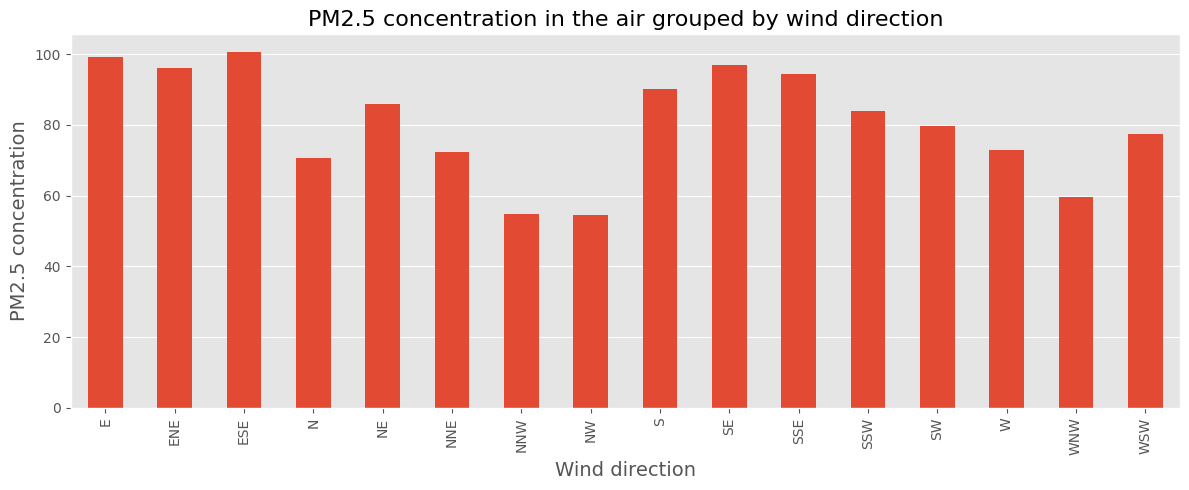

In [ ]:
wind_dir = data[['wd','PM2.5']]
wind_dir = wind_dir.groupby('wd').mean()

# plot the data
with plt.style.context('ggplot'):
    wind_dir.plot(figsize=(12,5),legend=False,kind='bar',linewidth=.9)
    plt.xlabel('Wind direction',fontsize=14)
    plt.ylabel('PM2.5 concentration',fontsize=14)
    plt.title('PM2.5 concentration in the air grouped by wind direction',fontsize=16)
    plt.grid(axis='x')
    plt.tight_layout()
    plt.show()

## Checking Outliers

In [ ]:
# Draw boxplot for all numeric columns
plt.figure(figsize=(12, 10))
for i, col in enumerate(preprocessed_data):
    plt.subplot(4, 4, i + 1)
    sns.boxplot(x=preprocessed_data[col])
    plt.title(f'Boxplot of {col}')
    plt.tight_layout()

plt.show()

NameError: name 'preprocessed_data' is not defined

<Figure size 1200x1000 with 0 Axes>

# 3. Data Preprocessing

In [ ]:
preprocessed_data = data.copy()

## Encoding Categorical Features

In [ ]:
def sort_value(data, group):
    # Group by 'group' and calculate mean 'PM2.5'
    grouped = data.groupby(group)['PM2.5'].mean().reset_index()

    # Sort by mean 'PM2.5'
    grouped_sorted = grouped.sort_values(by='PM2.5')

    # Assign numerical values
    grouped_sorted['New'+group] = range(1, len(grouped_sorted) + 1)

    # Create the mapping
    id_mapping = dict(zip(grouped_sorted[group], grouped_sorted['New'+group]))

    # Apply the mapping
    data['New'+group] = data[group].map(id_mapping)
    return id_mapping

wd_id_mapping = sort_value(preprocessed_data, 'wd')
preprocessed_data.drop(columns=['wd'], inplace = True)
preprocessed_data

,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM,PM2.5,Newwd
0,129.0,29.0,78.0,4800.0,2.0,-0.7,1019.6,-4.6,0.0,0.9,116.0,13.0
1,101.0,4.0,49.0,2500.0,2.0,21.2,992.8,20.7,0.0,1.3,141.0,10.0
2,29.0,NaN,20.0,400.0,40.0,-1.1,1016.0,-16.5,0.0,2.1,26.0,15.0
3,419.0,13.0,176.0,7900.0,2.0,-1.0,1023.8,-3.2,0.0,1.6,378.0,16.0
4,140.0,2.0,24.0,1000.0,58.0,21.6,991.0,19.9,0.0,0.6,140.0,15.0
...,...,...,...,...,...,...,...,...,...,...,...,...
280507,98.0,24.0,82.0,1700.0,23.0,0.6,1013.1,-5.9,0.0,0.8,101.0,3.0
280508,150.0,29.0,58.0,1700.0,16.0,-2.5,1020.7,-6.7,0.0,1.3,137.0,14.0
280509,283.0,18.0,116.0,4400.0,6.0,1.0,1021.0,-0.6,0.0,0.9,191.0,3.0
280510,85.0,3.0,19.0,400.0,79.0,35.0,994.4,15.8,0.0,1.1,30.0,12.0


In [ ]:
preprocessed_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 280512 entries, 0 to 280511
Data columns (total 12 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   PM10    276518 non-null  float64
 1   SO2     274943 non-null  float64
 2   NO2     272151 non-null  float64
 3   CO      266022 non-null  float64
 4   O3      272089 non-null  float64
 5   TEMP    280226 non-null  float64
 6   PRES    280228 non-null  float64
 7   DEWP    280221 non-null  float64
 8   RAIN    280232 non-null  float64
 9   WSPM    280278 non-null  float64
 10  PM2.5   274850 non-null  float64
 11  Newwd   279068 non-null  float64
dtypes: float64(12)
memory usage: 25.7 MB


## Handling Missing Values

In [ ]:
miss_value(preprocessed_data)

PM10     1.423825
SO2      1.985298
NO2      2.980621
CO       5.165554
O3       3.002724
TEMP     0.101956
PRES     0.101243
DEWP     0.103739
RAIN     0.099817
WSPM     0.083419
PM2.5    2.018452
Newwd    0.514773
dtype: float64

In [ ]:
# xóa các hàng có giá trị PM2.5 thiếu
preprocessed_data.dropna(inplace=True)
miss_value(preprocessed_data)

PM10     0.0
SO2      0.0
NO2      0.0
CO       0.0
O3       0.0
TEMP     0.0
PRES     0.0
DEWP     0.0
RAIN     0.0
WSPM     0.0
PM2.5    0.0
Newwd    0.0
dtype: float64

In [ ]:
preprocessed_data

,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM,PM2.5,Newwd
0,129.0,29.0,78.0,4800.0,2.0,-0.7,1019.6,-4.6,0.0,0.9,116.0,13.0
1,101.0,4.0,49.0,2500.0,2.0,21.2,992.8,20.7,0.0,1.3,141.0,10.0
3,419.0,13.0,176.0,7900.0,2.0,-1.0,1023.8,-3.2,0.0,1.6,378.0,16.0
4,140.0,2.0,24.0,1000.0,58.0,21.6,991.0,19.9,0.0,0.6,140.0,15.0
5,165.0,15.0,80.0,800.0,3.0,19.4,990.0,6.5,0.0,1.2,58.0,10.0
...,...,...,...,...,...,...,...,...,...,...,...,...
280507,98.0,24.0,82.0,1700.0,23.0,0.6,1013.1,-5.9,0.0,0.8,101.0,3.0
280508,150.0,29.0,58.0,1700.0,16.0,-2.5,1020.7,-6.7,0.0,1.3,137.0,14.0
280509,283.0,18.0,116.0,4400.0,6.0,1.0,1021.0,-0.6,0.0,0.9,191.0,3.0
280510,85.0,3.0,19.0,400.0,79.0,35.0,994.4,15.8,0.0,1.1,30.0,12.0


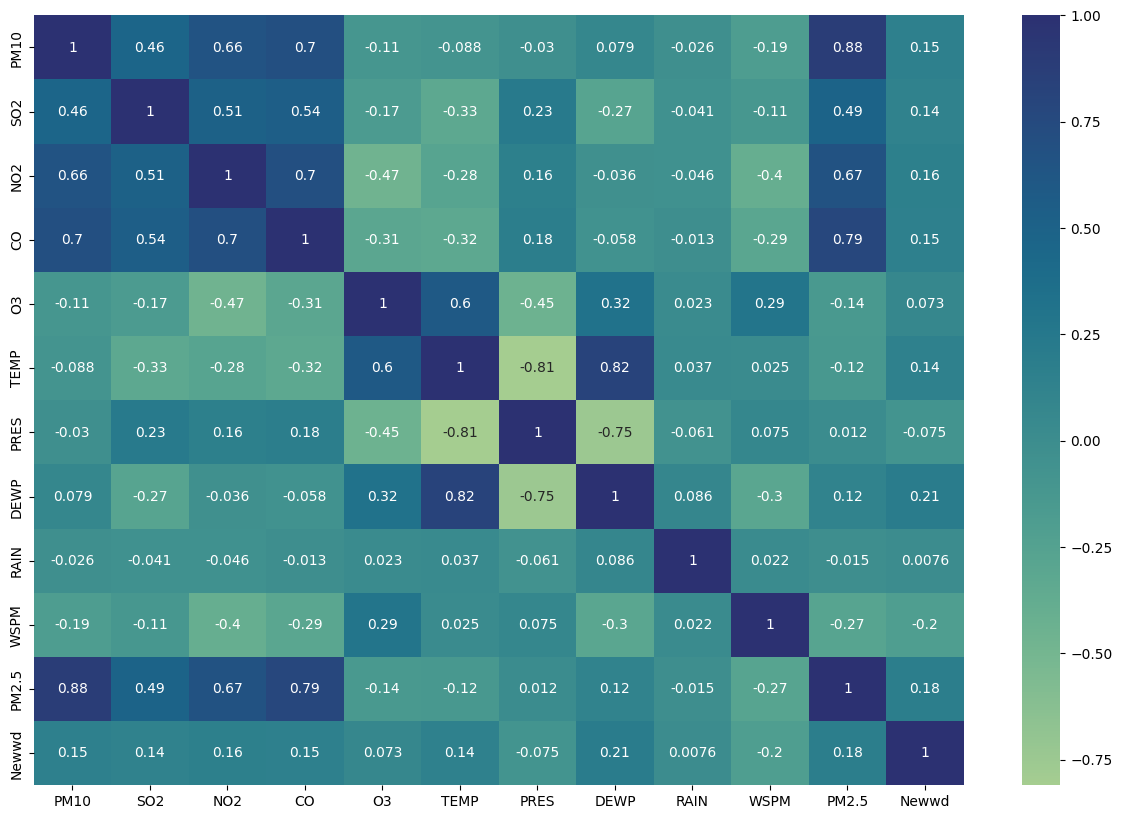

In [ ]:
corr(preprocessed_data)

## Data Scaling and Distributing



In [ ]:
X_data, Y_data = preprocessed_data.drop("PM2.5", axis=1), preprocessed_data["PM2.5"]

In [ ]:
# from sklearn.preprocessing import MinMaxScaler, StandardScaler
# from sklearn.pipeline import Pipeline
# preprocessor = Pipeline([
#     ('normalizing', MinMaxScaler()),  # Normalizing numerical features
#     ('standardizing', StandardScaler())  # Standardizing numerical features
# ])

In [ ]:
x_train, x_val, y_train, y_val = train_test_split(X_data, Y_data, test_size=0.0001, random_state=42)

In [ ]:
# x_train = preprocessor.fit_transform(x_train)
# x_val = preprocessor.transform(x_val)

# 4. Training a Model

Evaluating fuction

In [ ]:
def mdape(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    # Avoid division by zero
    percentage_errors = np.abs((y_true - y_pred) / np.clip(y_true, a_min=1e-10, a_max=None)) * 100
    return np.median(percentage_errors)

def predict(input_data, model, labels):
    preds = model.predict(input_data)
    return mdape(labels, preds)

In [ ]:
xgb_model = xgb.XGBRegressor()
xgb_model.fit(x_train, y_train, eval_set=[(x_val, y_val)], verbose=True)
predict(x_val, xgb_model, y_val)

[0]	validation_0-rmse:69.59309
[1]	validation_0-rmse:52.82738
[2]	validation_0-rmse:41.56829
[3]	validation_0-rmse:34.93516
[4]	validation_0-rmse:31.02180
[5]	validation_0-rmse:29.36548
[6]	validation_0-rmse:28.24285
[7]	validation_0-rmse:27.52648
[8]	validation_0-rmse:26.81476
[9]	validation_0-rmse:26.54896
[10]	validation_0-rmse:25.74037
[11]	validation_0-rmse:25.48757
[12]	validation_0-rmse:25.64191
[13]	validation_0-rmse:25.57271
[14]	validation_0-rmse:25.57218
[15]	validation_0-rmse:25.67490
[16]	validation_0-rmse:25.85238
[17]	validation_0-rmse:25.41356
[18]	validation_0-rmse:25.35456
[19]	validation_0-rmse:25.25637
[20]	validation_0-rmse:25.09410
[21]	validation_0-rmse:25.26831
[22]	validation_0-rmse:25.23387
[23]	validation_0-rmse:24.97362
[24]	validation_0-rmse:24.96819
[25]	validation_0-rmse:24.74676
[26]	validation_0-rmse:24.80938
[27]	validation_0-rmse:24.85541
[28]	validation_0-rmse:24.82426
[29]	validation_0-rmse:24.58884
[30]	validation_0-rmse:24.41014
[31]	validation_0-

14.394616624384977

In [ ]:
xgb_model = xgb.XGBRegressor(
    n_estimators=300,
    learning_rate=0.1,
    max_depth=14,
)

# Huấn luyện mô hình với early stopping
xgb_model.fit(
    x_train, y_train,
    eval_set=[(x_val, y_val)],
    verbose=True
)

predict(x_val, xgb_model, y_val)

[0]	validation_0-rmse:86.43194
[1]	validation_0-rmse:78.61000
[2]	validation_0-rmse:71.66919
[3]	validation_0-rmse:65.09941
[4]	validation_0-rmse:59.00393
[5]	validation_0-rmse:53.49160
[6]	validation_0-rmse:49.05346
[7]	validation_0-rmse:45.66052
[8]	validation_0-rmse:42.43895
[9]	validation_0-rmse:39.76757
[10]	validation_0-rmse:37.13525
[11]	validation_0-rmse:34.83318
[12]	validation_0-rmse:32.92771
[13]	validation_0-rmse:31.03831
[14]	validation_0-rmse:30.10512
[15]	validation_0-rmse:28.76824
[16]	validation_0-rmse:27.62532
[17]	validation_0-rmse:26.73171
[18]	validation_0-rmse:25.84048
[19]	validation_0-rmse:25.18913
[20]	validation_0-rmse:24.73620
[21]	validation_0-rmse:24.14589
[22]	validation_0-rmse:23.88834
[23]	validation_0-rmse:23.66210
[24]	validation_0-rmse:23.44842
[25]	validation_0-rmse:23.37890
[26]	validation_0-rmse:23.45276
[27]	validation_0-rmse:23.29774
[28]	validation_0-rmse:23.19676
[29]	validation_0-rmse:23.13108
[30]	validation_0-rmse:22.99340
[31]	validation_0-

12.763986913566914

# 5. Prediction

In [ ]:
test_data = pd.read_csv('public_test_set.csv')
test_data['Newwd'] = test_data['wd'].map(wd_id_mapping)
# test_data['PM10.2'] = test_data['PM10']/test_data['CO']
test_data.drop(columns = ['wd'], inplace = True)
test_data

,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM,Newwd
0,5.0,3.0,2.0,200.0,79.0,-3.0,1021.3,-19.9,0.0,0.2,13
1,6.0,3.0,4.0,200.0,79.0,-4.5,1022.6,-19.5,0.0,1.7,2
2,10.0,3.0,4.0,200.0,77.0,-4.5,1023.4,-19.5,0.0,1.8,2
3,6.0,3.0,2.0,200.0,80.0,-2.1,1024.6,-20.0,0.0,2.5,1
4,7.0,3.0,3.0,200.0,79.0,-0.2,1025.2,-20.5,0.0,2.8,2
...,...,...,...,...,...,...,...,...,...,...,...
64069,32.0,3.0,24.0,400.0,72.0,12.5,1013.5,-16.2,0.0,2.4,1
64070,32.0,3.0,41.0,500.0,50.0,11.6,1013.6,-15.1,0.0,0.9,3
64071,28.0,4.0,38.0,500.0,54.0,10.8,1014.2,-13.3,0.0,1.1,1
64072,23.0,4.0,30.0,400.0,59.0,10.5,1014.4,-12.9,0.0,1.2,2


In [ ]:
test_data.describe(include='all').transpose()

,count,mean,std,min,25%,50%,75%,max
PM10,64074.0,98.535741,89.976808,2.0000,32.0,75.0,137.00,961.0
SO2,64074.0,14.607789,20.365271,0.5712,2.0,6.0,18.00,273.0
NO2,64074.0,41.607275,34.400939,2.0000,15.0,32.0,61.00,241.0
CO,64074.0,1144.627524,1103.330968,100.0000,400.0,800.0,1400.00,10000.0
O3,64074.0,62.531834,56.254798,0.2142,17.0,53.0,87.00,500.0
TEMP,64074.0,13.667205,11.411053,-16.8000,3.3,14.6,23.40,41.4
PRES,64074.0,1009.677971,10.600887,982.8000,1001.1,1009.0,1018.00,1042.0
DEWP,64074.0,2.019162,13.797047,-35.3000,-9.6,2.4,14.70,28.5
RAIN,64074.0,0.062379,0.781333,0.0000,0.0,0.0,0.00,52.1
WSPM,64074.0,1.802378,1.250224,0.0000,1.0,1.5,2.30,13.2


In [ ]:
# test_data_processed = preprocessor.transform(test_data)
predictions = xgb_model.predict(test_data)

In [ ]:
# Save prediction
results = pd.DataFrame(predictions, columns=['res'])
results.to_csv('res.csv', index=False)

with zipfile.ZipFile('prediction.zip', 'w') as zipf:
    zipf.write('res.csv')
with zipfile.ZipFile('final_submission.zip', 'w') as zipf:
    zipf.write('prediction.zip')